# Анализ данных в игровой индустрии

## План работы

**Этап 1. Получим данные и посмотрим на общую информацию о столбцах <br />**

**Этап 2. Предобработка данных <br />**
- Заменим названия столбцов (приведем к нижнему регистру).
- Преобразуем данные в нужные типы.
- Обработаем пропуски при необходимости.
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

**Этап 3. Исследовательский анализ данных <br />**
- Посмотрим сколько игр выпускалось в разные годы.
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Найдем популярные в прошлом платформы, у которых сейчас продажи на нуле. Определим характерный период когда появляются новые и исчезают старые платформы.
- Определим наиболее актуальный период, чтобы исключить распределение по платформам в 2016 году. В дальнейшем будем работать с этим промежутком.
- Найдем какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Найдем разницу в продажах, в средних продажах на разных платформах и опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы и соотнесем их с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Найдем что можно сказать о самых прибыльных жанрах? Определим выделяются ли жанры с высокими и низкими продажами?

**Этап 4. Портрет среднестатистического геймера в разных регионах (NA, EA, JP) <br />**
Для пользователя каждого региона определим:
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Этап 5. Исследование статистических показателей <br />**
- Выясним как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построем гистограммы и опишем распределения.

**Этап 6. Проверка гипотез <br />**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Этап 7. Вывод <br />**

## Описание данных games.csv

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*

## Этап 1. Получение данных

### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

Прочитаем файл 'games.csv' и сохраним его в переменной df. Взглянем на первые несколько строк таблицы.

In [2]:
df = pd.read_csv('./games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Получим общую информацию о каждом из столбцов.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Этап 2. Предобработка данных

### Работа со столбцами

Посмотрим не наблюдается ли каких либо проблем с названиями столбцов (лишние пробелы и тд)

In [4]:
df.columns # получаем список всех столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Для удобства заменим название столбцов, путем приведения к нижнему регистру

In [5]:
df.columns = df.columns.str.lower() 

Проверим правильно ли мы все сделали

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Для удобства сразу разделим столбцы по категориям на количественные, порядковые и категориальные

In [8]:
num_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
ordinal_cols = ['year_of_release', 'critic_score', 'user_score', 'rating']
cat_cols = ['name', 'platform', 'genre']

### Работа с пропусками

Вспомним, что мы видели на этапе с знакомством с данными

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Первое что бросается в глаза - большое количество пропусков в столбцах, особенно в столбцах с оценками (critic_score / user_score / rating). С этим нужно что-то делать и этим мы сейчас и займемся.

#### Пропуски в столбцах name & genre

Посмотрим на пропуски в столбцах name и genre

In [10]:
df[df['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 строки имеют пропуски в имени, и те же самые строки имеют пропуск в стобце жанр (а также для них отсутствуют многие другие значения). Можем смело откинуть эти строки, в силу их неинформативности (и маленького количества).

In [12]:
df.dropna(subset=['name', 'genre'], inplace=True)

#### Пропуски в столбце year_of_release

Теперь обработаем пропуски в столбце year_of_release

In [13]:
df.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [14]:
df['year_of_release'].isnull().sum()  # количество пропусков в столбце year_of_release

269

Заметим, что в названиях некоторых игр год выпуска указан в конце самого названия. Попробуем как-то извлечь года из таких игр и заполнить недостающие данные

In [15]:
import re  # работа с регулярными выражениями

name_to_year = dict()

# сопостовляем именам четырехзначное число, которое они содержат
for name in df.query('year_of_release.isnull()')['name']:
    if re.search('\d\d\d\d', name):
        name_to_year[name] = int(re.search('\d\d\d\d', name).group())

name_to_year

{'Madden NFL 2004': 2004,
 'FIFA Soccer 2004': 2004,
 'wwe Smackdown vs. Raw 2006': 2006,
 'NASCAR Thunder 2003': 2003,
 'PES 2009: Pro Evolution Soccer': 2009,
 'Madden NFL 2002': 2002,
 'NFL GameDay 2003': 2003,
 'NBA Live 2003': 2003,
 'Tomb Raider (2013)': 2013,
 'All-Star Baseball 2005': 2005,
 'Tour de France 2011': 2011,
 'Sega Rally 2006': 2006,
 'PDC World Championship Darts 2008': 2008,
 'Football Manager 2007': 2007}

(на всякий случай убедились, что это действительно валидные года, а не просто четырехзначные числа)

In [16]:
# для каждой игры из словаря меняем год на соответствующий

for name in name_to_year:
    df['year_of_release'] = df['year_of_release'].where(df['name'] != name, name_to_year[name])


Посмотрим на сделанное изменение

In [17]:
df.query('name.isin(@name_to_year)').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
452,Madden NFL 2002,PS2,2002.0,Sports,2.50,0.16,0.01,0.42,94.0,7.9,E
475,wwe Smackdown vs. Raw 2006,PS2,2006.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
617,PES 2009: Pro Evolution Soccer,PS2,2009.0,Sports,0.13,0.07,0.26,2.05,NaN,NaN,NaN


P.S. некоторые игры выпускаются сразу на нескольких платформах, поэтому имена игр повторяются (но это не дубликаты, в силу различий в платформе)

Посмотрим на оставшиеся пропуски в годе выпуска

In [18]:
df.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+


Попробуем найти какие-то подсказки для заполнения данных пропусков

К примеру, взглянем на все игры с названием LEGO Batman: The Videogame

In [19]:
df.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Давайте попробуем заполнить год выпуска для игр, основываясь на дате выхода той же игры но на другой платформе (в случае игры LEGO Batman: The Videogame довольно логично, что можно заменить пропуск в годе выпуска на 2008)

Поскольку одна и та же игра может выходить в разные года для разных платформ, то будем заполнять пропущенные года используя моду (т.к. рассматриваемый столбец, year_of_release - порядковый признак).

In [20]:
missed_year = df.query('year_of_release.isnull()')['name']  # имена игр с пропущенными годами выпуска

for name in missed_year:
    # проверяем есть ли данные о годе выпуска игры на других платформах
    
    if not df.query('name == @name and not year_of_release.isnull()').empty:
        # считаем моду
        mode = df.query('name == @name and not year_of_release.isnull()')['year_of_release'].mode().iat[0]
        
        # заменяем пропуски модой
        df.loc[(df.name == name) & (df.year_of_release.isnull()), 'year_of_release'] = mode


In [21]:
df.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.0,0.10,NaN,NaN,NaN


In [22]:
df['year_of_release'].isnull().sum()

139

Из 269 изначально пропущенных значений в столбце year_of_release мы заполнили 130, но остались еще 139. Оставшиеся пропуски обозначим нулем для удобства.

In [23]:
df.loc[df['year_of_release'].isnull(), 'year_of_release'] = 0

Поменяем тип year_of_release на int, поскольку год - это целое число

In [24]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Пропуски в столбцах user_score и critic_score

Еще раз посмотрим на общую информацию о столбцах

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Поскольку user_score на самом деле численный признак, попробуем преобразовать его используя метод to_numeric

In [27]:
# df['user_score'] = pd.to_numeric(df['user_score'])

А вот и причина того, что user_score имеет тип object - некоторые значения в этом столбце равны tbd. TBD - аббревиатура, которая означает to be done/ to be discussed/ to be decided, в общем что-то, что по какой-то причине не было заполнено и было отложено на будущее. Давайте взглянем на эти пропуски

In [28]:
df.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


In [29]:
df.query('user_score == "tbd"').shape

(2424, 11)

Целых 2424 строк, в которых оказалось это таинственное значение tbd.

Поскольку, вряд ли мы узнаем природу этих пропусков, обозначим их через NaN как и остальные пропуски

In [30]:
df.loc[df['user_score'] == "tbd", 'user_score'] = np.nan

Преобразуем user_score в float

In [31]:
df['user_score'] = df['user_score'].astype(float)

In [32]:
df.info()  # проверим изменение

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Давайте попробуем воспользоваться уже известной нам стратегией: заполним user_score для игр, основываясь на оценках той же игры но на других платформах. Но только на этот раз будем использовать медиану, поскольку, user_score - числовой признак.

In [33]:
missed_user_score = df.query('user_score.isnull()')['name']

for name in missed_user_score:
    # проверяем есть ли данные о пользовательской оценке игры на других платформах
    
    if not df.query('name == @name and not user_score.isnull()').empty:
        # считаем медиану
        median = df.query('name == @name and not user_score.isnull()')['user_score'].median()
        
        # заменяем пропуски медианой
        df.loc[(df.name == name) & (df.user_score.isnull()), 'user_score'] = median


Аналогично заполняем и для critic_score

In [34]:
missed_critic_score = df.query('critic_score.isnull()')['name']

for name in missed_critic_score:
    # проверяем есть ли данные об оценке критиков данной игры на других платформах
    
    if not df.query('name == @name and not critic_score.isnull()').empty:
        # считаем медиану
        median = df.query('name == @name and not critic_score.isnull()')['critic_score'].median()
        
        # заменяем пропуски медианой
        df.loc[(df.name == name) & (df.critic_score.isnull()), 'critic_score'] = median

Посмотрим как связаны между собой оценки пользователей и оценки критиков.

In [35]:
# данные с заполненными critic_score и user_score

good_data = df.query('not user_score.isnull() and not critic_score.isnull()')

In [36]:
good_data[['critic_score', 'user_score']].corr()

,critic_score,user_score
critic_score,1.000000,0.547932
user_score,0.547932,1.000000


Коэффициент Пирсона показывает довольно сильную корреляцию этих двух признаков (что неудивительно, т.к. объективно хорошая игра скорее всего будет высоко оценена одновременно пользователями и критиками, и наоборот). Посчитаем отношение этих двух признаков для каждой из игры (для которых оба этих значения известны).

In [37]:
relation = (good_data['critic_score'] / good_data['user_score'])

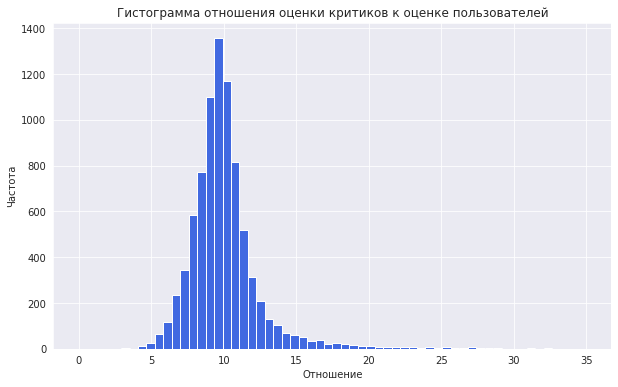

In [38]:
relation.hist(range=(0, 35), 
              bins=60,
              color='royalblue',
              figsize=(10, 6))
plt.ylabel('Частота')
plt.xlabel('Отношение')
plt.title('Гистограмма отношения оценки критиков к оценке пользователей');

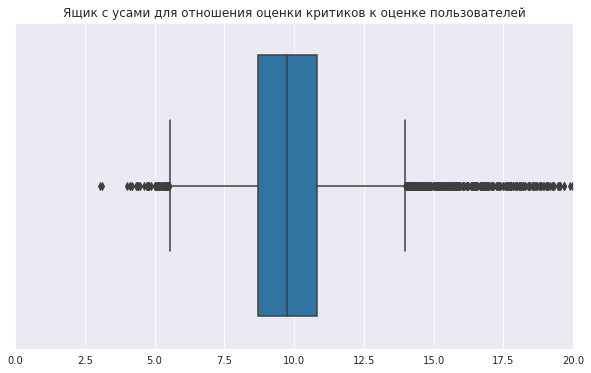

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(relation)
plt.xlim(0, 20)
plt.title('Ящик с усами для отношения оценки критиков к оценке пользователей');

In [40]:
relation.describe()

count    8353.000000
mean       10.223034
std         5.860360
min         3.033708
25%         8.695652
50%         9.743590
75%        10.804598
max       412.500000
dtype: float64

In [41]:
relation_median = relation.median()
relation_median

9.743589743589745

В итоге получаем, что в среднем critic_score в 9.743589743589745 раз больше чем user_score, используя эти знания заполним некоторые из пропусков (среднее в терминах медианы, т.к. она более устойчива к выбросам).

In [42]:
df.loc[
    (~df['critic_score'].isnull()) & 
    (df['user_score'].isnull()), 
    'user_score'
] = df['critic_score'] / relation_median  # строки в которых известен critic_score и не известен user_score

In [43]:
df.loc[
    (~df['user_score'].isnull()) & 
    (df['critic_score'].isnull()), 
    'critic_score'
] = df['user_score'] * relation_median  # строки в которых известен user_score и не известен critic_score

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9434 non-null   float64
 9   user_score       9434 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.2+ MB


В результате нашей замены пропусков, у нас для каждого наблюдения либо оба значения из столбцов critic_score и user_score заполнены, либо оба нет.

#### Пропуски в rating

Поскольку рейтинг игры не должен зависить от платформы (т.к. возрастное ограничение ставится в зависимости от самого содержания игры), для каждой игры пропуски в столбце rating можно заменить основываясь на их ESRB рейтинге на других платформах. 

Проверим это предпололжение (о совпадении ESRB рейтинга у одной и той же игры на разных платформах) на нашей выборке

In [45]:
missed_rating = df.query('rating.isnull()')['name']

for name in missed_rating:
    # проверяем есть ли данные о рейтинге данной игры на других платформах
    
    if not df.query('name == @name and not rating.isnull()').empty:
        # находим rating
        rating = df.query('name == @name and not rating.isnull()')['rating'].mode().iat[0]
        # используем моду, поскольку, для некоторых игр наше предположение может не работать
        
        # заменяем пропуски
        df.loc[(df.name == name) & (df.rating.isnull()), 'rating'] = rating

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9434 non-null   float64
 9   user_score       9434 non-null   float64
 10  rating           10386 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.2+ MB


#### Суммарные продажи во всех регионах

In [47]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']

In [48]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


### Итоги обработки:
- Заполнили часть пропусков в year_of_release используя регулярные выражения
- Заполнили часть пропусков, используя информацию по одним и тем же играм но вышедших на разных платформах
- Заполнили пропуски в user_score и critic_score, используя высокую корреляцию этих признаков
- Добавили новый столбец - суммарные продажи во всем мире

## Этап 3. Исследовательский анализ данных

#### Посмотрим сколько игр выпускалось в разные годы

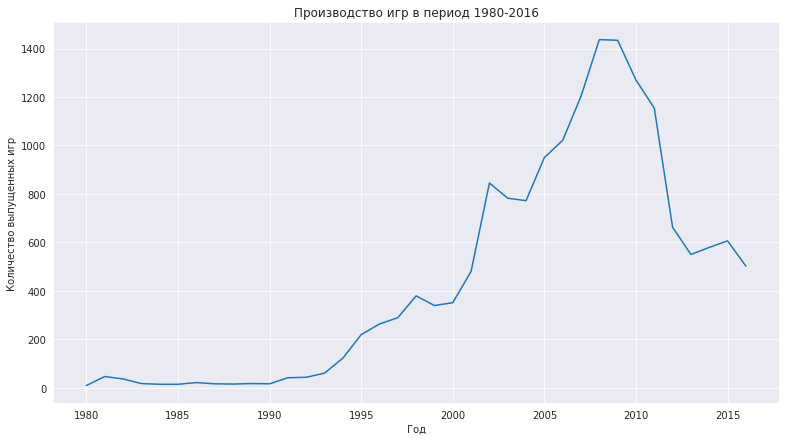

In [49]:
# группируем данные по году выпуска и платформе
# для каждой группы считаем общее количество игр
# сохраняем результат в переменной games_per_year

games_per_year = df.query('year_of_release != 0').groupby('year_of_release')['name'].count()

plt.figure(figsize=(13, 7))
sns.lineplot(data=games_per_year)
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')
plt.title('Производство игр в период 1980-2016');

#### Как видим:

до 2008-2009 годов наблюдалась тенденция увеличения производства игр с каждым годом, но внезапно количество ежегодно выпускаемых игр начала падать и нет никаких намеков на возрождение их былой популярности.

#### Рассмотрим топ-10 платформ по суммарным продажам, и построим их распределение по годам

In [50]:
# группируем выборку по платформе и сортируем по убыванию суммарных продаж
# топ 10 платформ сохраняем в переменной best_platforms

best_platforms = df.groupby('platform').sum().sort_values(by='world_sales', 
                                                     ascending=False).head(10).index

In [51]:
best_platforms

Index(['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'XB'], dtype='object', name='platform')

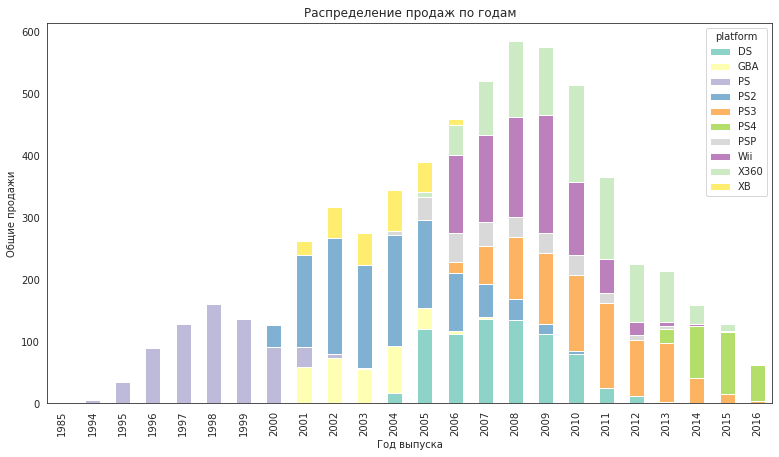

In [52]:
# группируем по году выпуска и по топ 10 платформам, суммируем для каждой группы общие продажы
# сохраняем результат в переменной sales_by_platform

sales_by_platform = df.query('platform.isin(@best_platforms) and year_of_release != 0').groupby(
    ['year_of_release', 'platform'])['world_sales'].sum()

# изображаем распределение продаж по годам и по каждой из платформ

with sns.axes_style('white'):
    sales_by_platform.unstack().plot(
        kind='bar',
        figsize=(13, 7),
        colormap='Set3',
        stacked=True
    )


plt.title('Распределение продаж по годам')
plt.ylabel('Общие продажи')
plt.xlabel('Год выпуска');

До 2001 года платформа PS являлась наиболее популярной среди рассматриваемых 10, и уже начиная с 2001 года доля игр на PS существенно начало падать вплоть до нулевых продаж в 2004-м и последующих годах. Аналогичную тенденцию можно заметить и с PS2, наследником консоли PS. 

Платформа GBA не может похвастаться лидирующими позициями в продажах, как предыдущие рассмотренные 2 платформы, но она была относительно популярной в период с 2001 по 2004, после чего также исчезла с рынка видеоигр. Ситуация с DS довольна схожа на GBA, но популярность этой платформы выпало на период 2005-2010. Платформа PSP хоть и никогда не выделялась большими продажами, но игры на ней продолжали выходить вплоть до 2013-го года. 

Игры на XB выходили в период с 2001 по 2006, и на ее место быстро пришла другая консоль X360, которая конкурировала с такими лидерами индустрии как Wii и PS3, на протяжении 10 лет. И наконец платформа PS4 - лидер продаж на 2016 год, начавшая набирать обороты с самого первого года ее появления в 2013 году.

Из диаграммы также можно выделить года с 2005-го по 2013-ый, период за который активно появлялись новые платформы как X360, Wii, PSP, PS3 и PS4, и уходили старые как DS и GBA.

Чтобы исключить значимое искажение распределения по платформам в 2016 году, будем рассматривать данные за период с 2005-го по 2016-ый.

In [53]:
new_df = df.query('year_of_release >=2005')
new_df.reset_index(inplace=True)
new_df.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
2,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
3,6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,26.92
4,7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,26.07


#### Посмотрим какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.

Обновим список лучших платформ за период 2005-2016.

In [54]:
new_best_platforms = new_df.groupby('platform').sum().sort_values('world_sales', ascending=False).head(10).index
new_best_platforms

Index(['X360', 'Wii', 'PS3', 'DS', 'PS2', 'PS4', 'PSP', '3DS', 'PC', 'XOne'], dtype='object', name='platform')

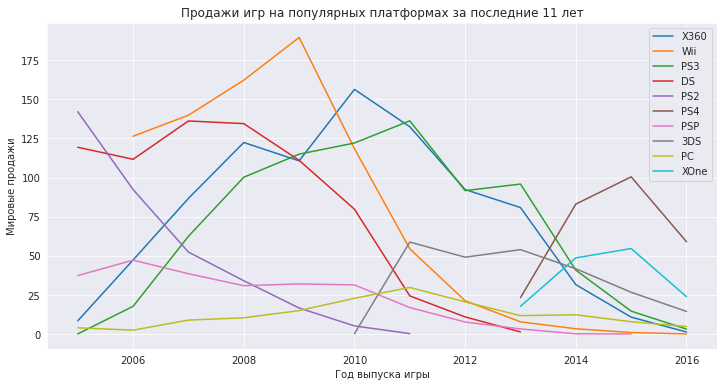

In [55]:
new_sales_by_platform = new_df.groupby(['year_of_release', 'platform'])['world_sales'].sum().unstack()

plt.figure(figsize=(12, 6))
for platform in new_best_platforms:
    sns.lineplot(data=new_sales_by_platform[platform].reset_index(),
                x='year_of_release',
                y=platform,
                label=platform)
    plt.legend()


plt.xlabel('Год выпуска игры')
plt.ylabel('Мировые продажи')
plt.title('Продажи игр на популярных платформах за последние 11 лет');

#### По картинке выше можно сделать следующие выводы:
- Продажи по платформам PS2, DS, PSP на 2016 год равны нулю
- Для всех платформ видна одна и та же закономерность - продажи падают с каждым годом
- На данный момент наиболее перспективными платформами являются: PS4, XOne и 3DS.

#### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по потенциально прибыльным платформам.

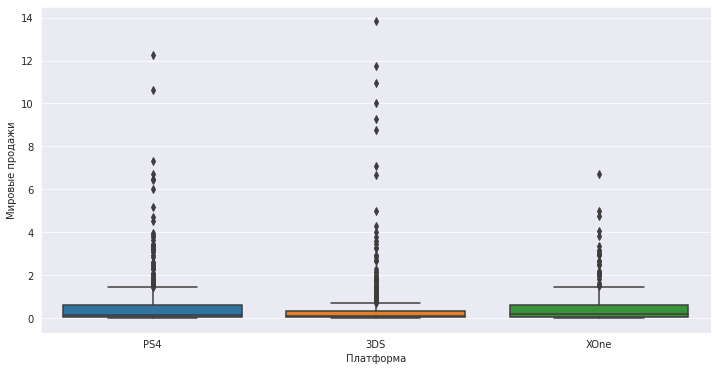

In [56]:
perspective_platforms = ['PS4', 'XOne', '3DS']

plt.figure(figsize=(12, 6))
sns.boxplot(data=new_df.query('platform.isin(@perspective_platforms)'), 
            x='platform', 
            y='world_sales')

plt.xlabel('Платформа')
plt.ylabel('Мировые продажи');

На всех 3х платформах есть выбросы (игры) с очень большими продажами. Чтобы увидеть более четкую картину, поставим лимит на ось y.

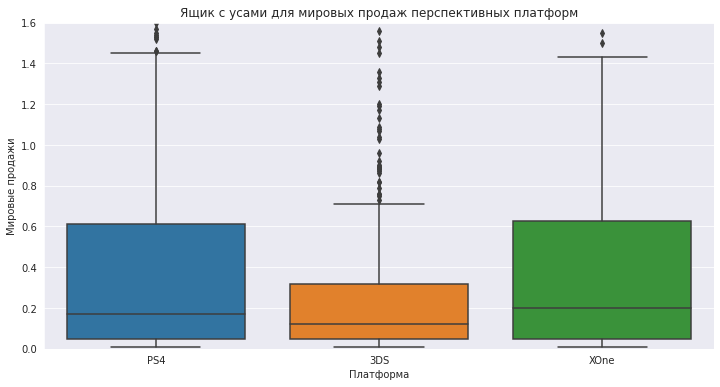

In [57]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=new_df.query('platform.isin(@perspective_platforms)'), 
                   x='platform', 
                   y='world_sales')
plt.ylim(0, 1.6)  # рассматриваем продажи на полуинтервале [0, 1.6)
plt.title('Ящик с усами для мировых продаж перспективных платформ')
plt.xlabel('Платформа')
plt.ylabel('Мировые продажи');

#### Видим, что:
- У всех 3х перспективных платформ есть выбросы в виде очень популярных игр (в терминах суммарных продаж).
- Выбросов больше всех наблюдается у платформы 3DS, затем у PS4, и потом у XOne.
- Общие продажы у PS4 и XOne не сильно отличаются, а у 3DS продажи заметно ниже чем у своих конкурентов
- Для PS4 медиана продаж выше чем у 3DS, но ниже чем у XOne.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  

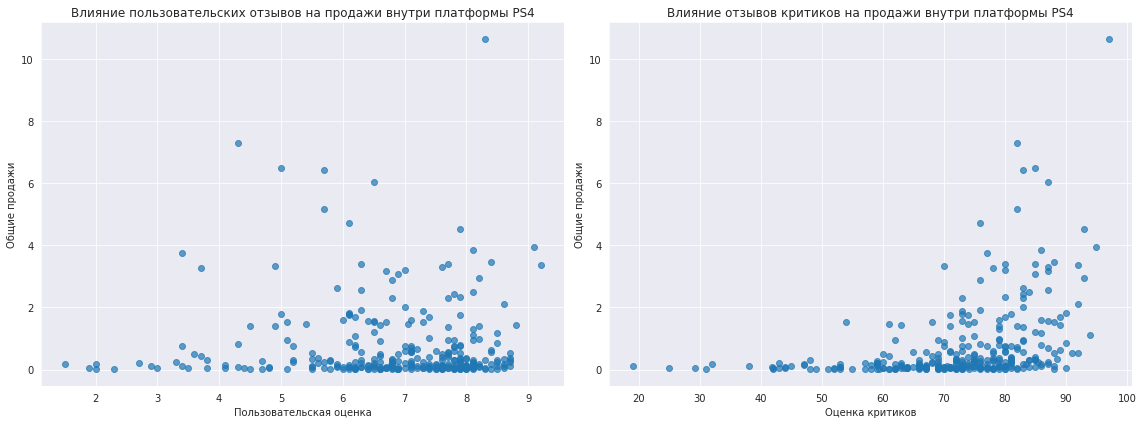

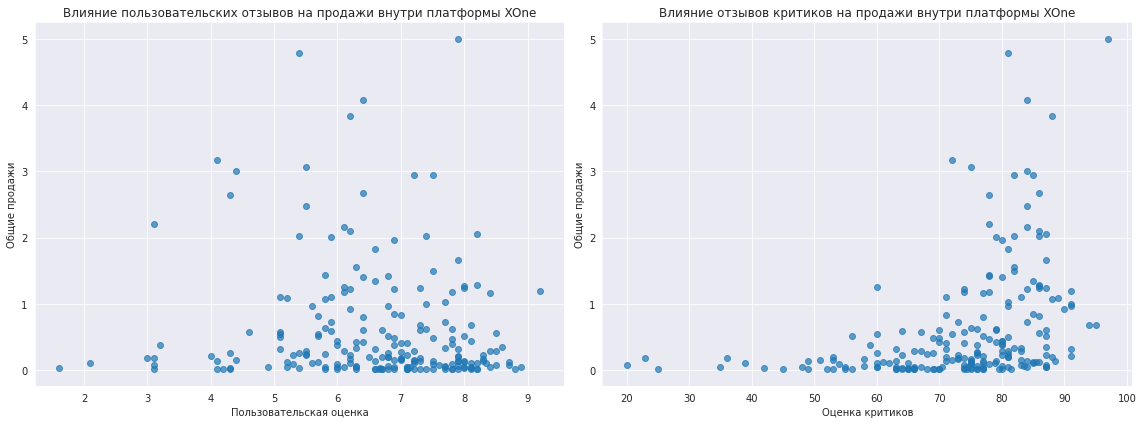

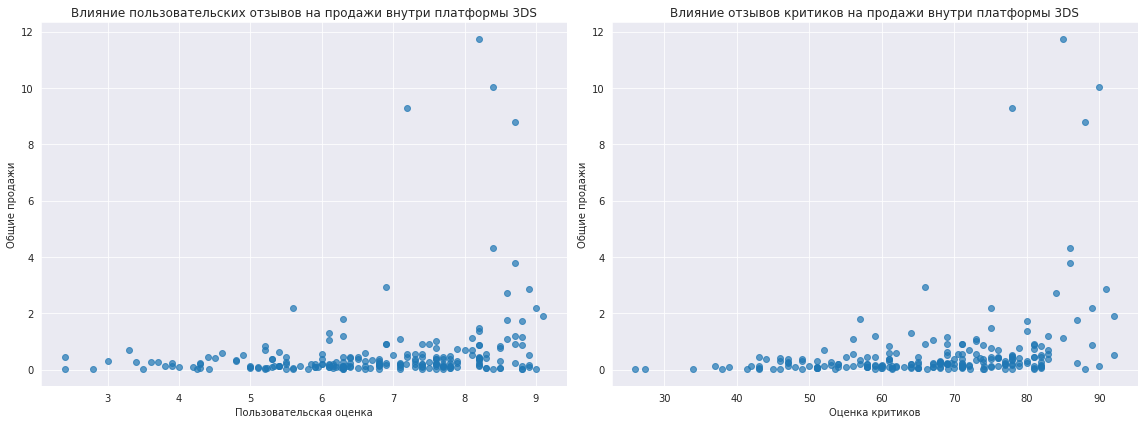

In [58]:
# для каждой потенциально прибыльной платформы нарисуем две диаграммы рассеяния

for platform in perspective_platforms:
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    axs[0].scatter(x='user_score', y='world_sales', data=new_df.query('platform == @platform'), alpha=0.7)
    axs[0].set_xlabel('Пользовательская оценка')
    axs[0].set_ylabel('Общие продажи')
    axs[0].set_title(f'Влияние пользовательских отзывов на продажи внутри платформы {platform}')
    
    axs[1].scatter(x='critic_score', y='world_sales', data=new_df.query('platform == @platform'), alpha=0.7)
    axs[1].set_xlabel('Оценка критиков')
    axs[1].set_ylabel('Общие продажи')
    axs[1].set_title(f'Влияние отзывов критиков на продажи внутри платформы {platform}')
    
    axs[0].grid(True)
    axs[1].grid(True)
    fig.tight_layout();


Из этих диаграмм можно заменить положительную корреляцию между отзывами критиков и мировыми продажами игр.

Убедимся в этом посчитав коэффициент корреляции Пирсона между общими продажами и пользовательским рейтингом, и оценкой критиков для каждой из платформ

In [59]:
print('-------------Платформа 3DS-------------')
new_df.query('platform == "3DS"')[['world_sales', 'user_score', 'critic_score']].corr()

-------------Платформа 3DS-------------


,world_sales,user_score,critic_score
world_sales,1.000000,0.240511,0.321602
user_score,0.240511,1.000000,0.693771
critic_score,0.321602,0.693771,1.000000


In [60]:
print('-------------Платформа PS4-------------')
new_df.query('platform == "PS4"')[['world_sales', 'user_score', 'critic_score']].corr()

-------------Платформа PS4-------------


,world_sales,user_score,critic_score
world_sales,1.000000,-0.020376,0.386826
user_score,-0.020376,1.000000,0.589412
critic_score,0.386826,0.589412,1.000000


In [61]:
print('-------------Платформа XOne-------------')
new_df.query('platform == "XOne"')[['world_sales', 'user_score', 'critic_score']].corr()

-------------Платформа XOne-------------


,world_sales,user_score,critic_score
world_sales,1.000000,-0.096396,0.373442
user_score,-0.096396,1.000000,0.486571
critic_score,0.373442,0.486571,1.000000


#### Вывод:
- Отзывы критиков имеют довольно немалую положительную корреляцию с продажами
- Отзывы пользователей имеют слабую (в некоторых случаях отрицательную) корреляцию с продажами
- Покупатели более склонны прислушиваться к мнению экспертов, нежели простых пользователей

#### Посмотрим на распределение игр по жанрам. Найдем самые прибыльные из них. Проверим выделяются ли жанры с высокими и низкими продажами.

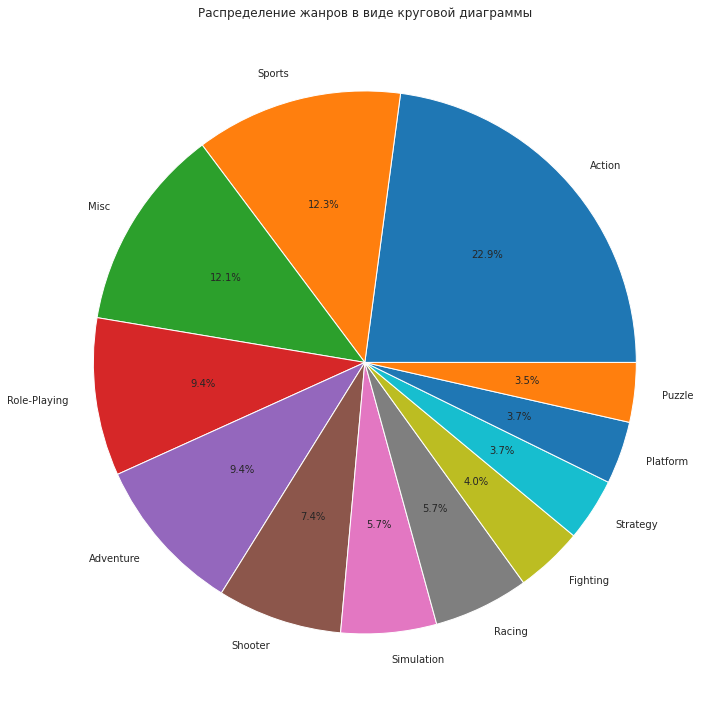

In [62]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(
    new_df['genre'].value_counts(normalize=True),
    labels=new_df['genre'].value_counts().index,
    autopct='%1.1f%%'
)
ax.set_title('Распределение жанров в виде круговой диаграммы')
fig.tight_layout();

    - Больше всего игр производят в жанрах Action, Sports и Misc.

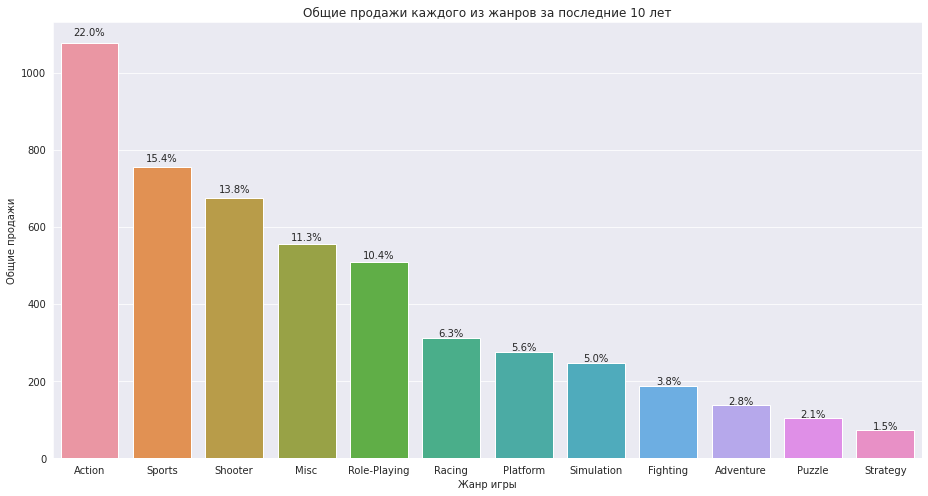

In [63]:
sales_by_genre = new_df.groupby(['genre'])['world_sales'].sum().reset_index().sort_values(
    by='world_sales', ascending=False)

plt.figure(figsize=(13, 7))
ax = sns.barplot(x=sales_by_genre['genre'], y=sales_by_genre['world_sales'])
plt.xlabel('Жанр игры')
plt.ylabel('Общие продажи')
plt.title('Общие продажи каждого из жанров за последние 10 лет')
plt.tight_layout()

total = sum(new_df['world_sales'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    ax.annotate(percentage, (x + width/2, y + height*1.02), ha='center')

plt.show()

#### Давайте посмотрим на медианные значения продаж по жанрам в течении последних 10 лет

Почему на медиану? Т.к. эта метрика более устойчива к выбросам, чем просто сумма и количественные показатели

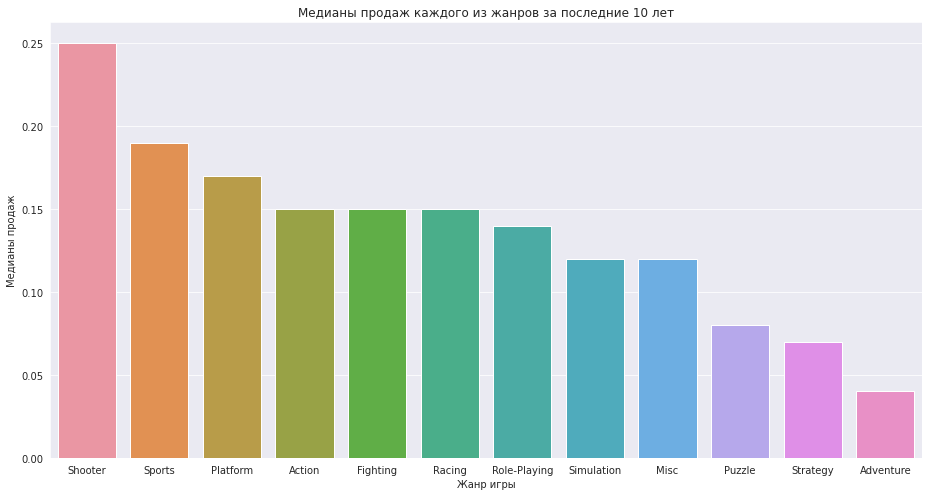

In [64]:
sales_by_genre = new_df.groupby(['genre'])['world_sales'].median().reset_index().sort_values(
    by='world_sales', ascending=False)

plt.figure(figsize=(13, 7))
ax = sns.barplot(x=sales_by_genre['genre'], y=sales_by_genre['world_sales'])
plt.xlabel('Жанр игры')
plt.ylabel('Медианы продаж')
plt.title('Медианы продаж каждого из жанров за последние 10 лет')
plt.tight_layout()

- Самые прибыльные жанры: Shooter, Sports, Platform
- Хоть игр в жанре Shooter произвелось меньше 8 процентов от всех игр, но по прибыльности он опережает даже  Action, самый часто выпускаемый из всех жанров
- Аналогичное можно сказать и про жанр Platform, который оказался третьим по прибыльности

### Итоги ИАД:
- Выяснили, что самый актуальный временной период для анализа - года с 2005-го по 2016-ый
- Посмотрели как меняются продажи по платформам
- Выбрали потенциально наиболее прибыльные платформы: PS4, XOne, 3DS
- Выяснили, что покупатели склонны прислушиваться к мнению критиков, нежели обычных пользователей
- Выявили самые прибыльные жанры за последние 11 лет: Shooter, Sports, Platform

## Этап 4. Портрет среднестатистического геймера в разных регионах

In [65]:
def plot_top5(by='', title='', xlabel='', ylabel='', color='royalblue'):
    """
    Функция отображает 3 столбчатой диаграммы,
    иллюстрирущие топ-5 для каждого из регионов
    
    Аргумент by - топ-5 чего будем выводить
    
    title - общее название для всех трех графиков
    
    xlabel - название оси x
    
    ylabel - название оси y
    
    color - цвет столбцов
    """
    
    
    by_regions = new_df.groupby(by)[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, (sales, region) in enumerate([('na_sales', 'Северная Америка'), 
                                ('eu_sales', 'Европа'), ('jp_sales', 'Япония')]):
        axs[i].bar(
            height=by_regions.sort_values(by=sales, ascending=False).head(5)[sales],
            x=by_regions.sort_values(by=sales, ascending=False).head(5)[by],
            color=color
        )
        total = sum(new_df.loc[~new_df[by].isnull()][sales])
        for p in axs[i].patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            axs[i].annotate(percentage, (x + width/2, y + height*1.02), ha='center')

            
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_title(region)
    
    fig.tight_layout()
    plt.suptitle(title, y=1.08);
        
    

 #### Топ-5 платформ в разных регионах

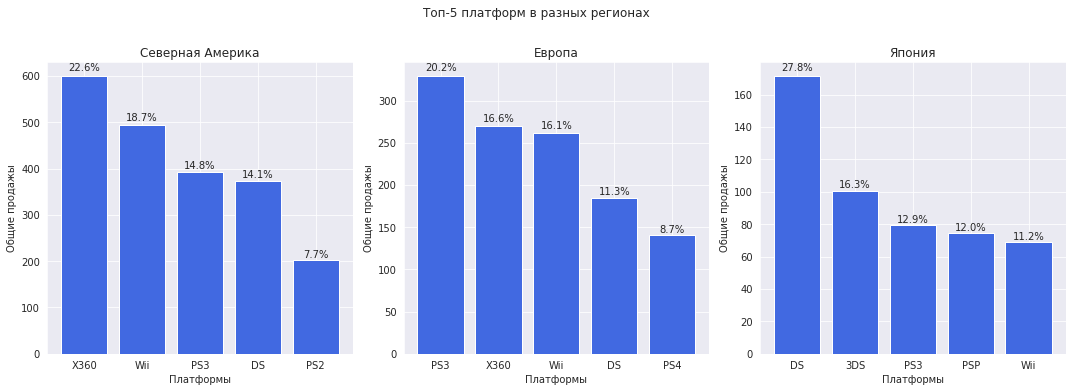

In [66]:
plot_top5('platform', 'Топ-5 платформ в разных регионах', 'Платформы', 'Общие продажы')

- В Японии платформа DS является самой популярной и на нее приходит целых 27.8% от всех продаж видеоигр, в то время как в Северной Америке и Европе доля DS составляет всего 14.1 и 11.3 процентов соответственно
- Приставка PS4 еще не успела попасть в топ-5 в Северной Америке и Японии, но уже занимает 8.7% от всех 
    продаж в Европе
- Самая популярная в Северной Америке платформа - X360, даже не входит в топ-5 платформ Японии

#### Топ-5 жанров в разных регионах

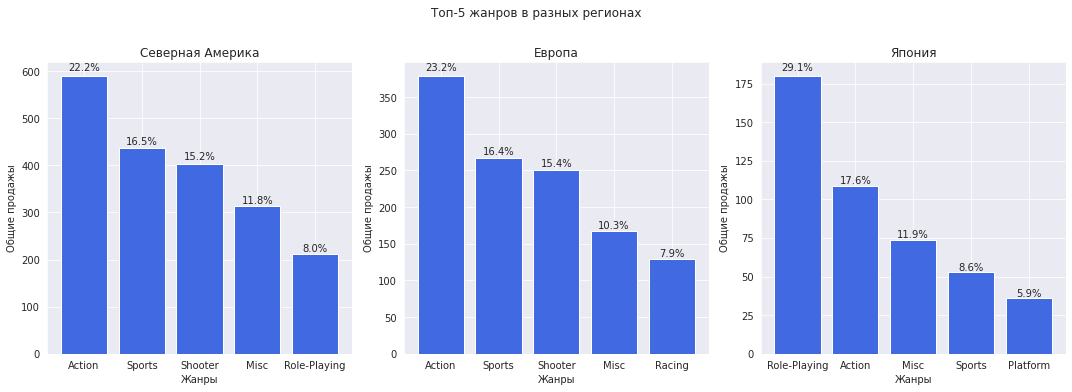

In [67]:
plot_top5('genre', 'Топ-5 жанров в разных регионах', 'Жанры', 'Общие продажы')

- Топ жанров в Европе и Северной Америке очень схожи, единственное отличие в том, что в Северной Америке 
    пятое место занимает жанр Role-Playing, в то время как в Европе это место занимает Racing
- А в Японии очень специфичный топ жанров по сравнению с прошлыми двумя. Первое место с долей 29.1% от 
    общих продаж занимает жанр Role-Playing, который даже не вошел в топ-5 жанров Европы

#### Топ-5 популярных  возрастных категорий в разных регионах

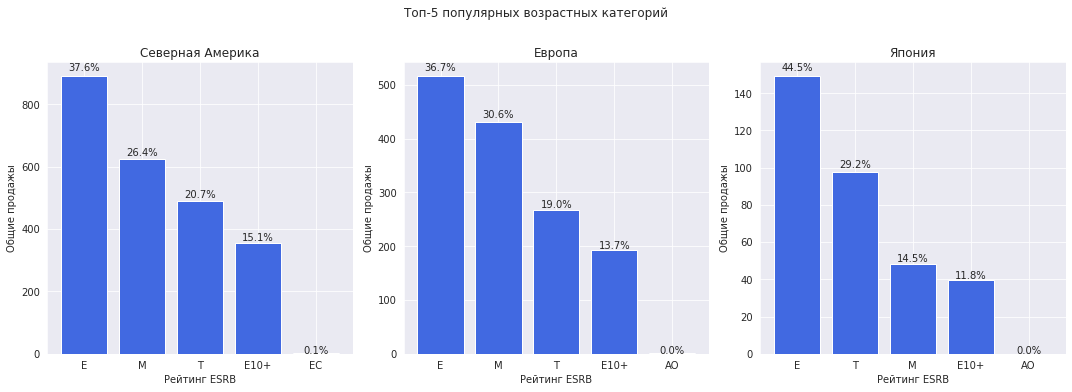

In [68]:
plot_top5('rating', 'Топ-5 популярных возрастных категорий', 'Рейтинг ESRB', 'Общие продажы')

- У Северной Америки и у Европы примерно одинаковый топ-5 возрастных категорий, с очень схожими долями
- В Японии топ отличается тем, что рейтинг T занимает 2-е место, а у двух других регионов 3-е
- Во всех трех регионах игры рейтинга E являются фаворитами по продажам

#### Портреты игроков из разных регионов:
- Типичный пользователь в Северной Америке: Играет в игры жанра Action с рейтингом E на X360
- Типичный пользователь в Европе: Предпочитает те же игры, что и Американец, но на консоли PS3
- Типичный пользователь в Японии: Играет в игры жанра Role-Playing рейтинга E на платформе DS

### Вывод:
- В силу больших отличий Японской культуры от Европейской и Американской, предпочтения 
    среднестатистического геймера из Японии сильно отличаются от выбора типичного игрока из других регионов
- И наоборот, в силу схожести культур людей Северной Америки и Европы, вкусы в играх у них так же очень 
    похожи

## Этап 5. Исследование статистических показателей

#### Посмотрим как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах

Для начала постмотрим на распределения рейтинга критиков в зависимости от жанра

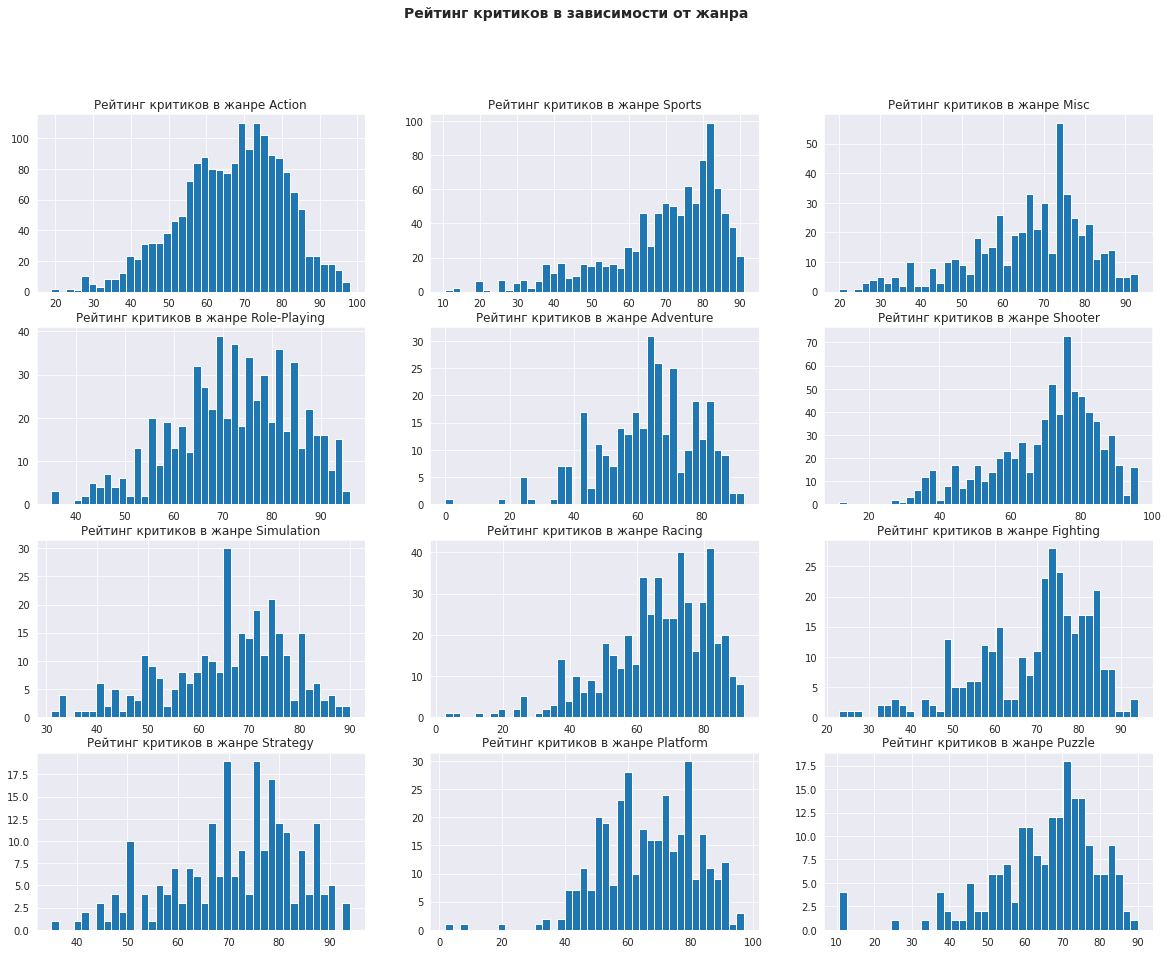

In [69]:
genres = list(new_df['genre'].value_counts().index)

fig, axs = plt.subplots(4, 3, figsize=(20, 15))
for i, genre in enumerate(genres):
    axs[i // 3][i % 3].hist(new_df.query('genre == @genre')['critic_score'], bins=40)
    axs[i // 3][i % 3].set_title(f'Рейтинг критиков в жанре {genre}')
    
    
plt.suptitle('Рейтинг критиков в зависимости от жанра', fontsize=14, fontweight='bold');

- Несложно заметить, что в зависимости от жанра игры, распределения оценок критиков могут сильно отличаться
- Для многих жанров распределение является скошенным влево. К примеру можно взять 
    жанры Action, Puzzle, Sports и Shooter
- А в других случаях оно имеет несколько пиков и остальные столбцы намного ниже этих пиков. К примеру жанры Strategy и Simulation.

In [70]:
for i, genre in enumerate(genres):
    print(f'Статистические показатели рейтинга критиков в жанре {genre}:')
    print('Среднее значение:', new_df.query('genre == @genre')['critic_score'].mean())
    print('Стандартное отклонение:', 
          new_df.query('genre == @genre')['critic_score'].std())
    print('Дисперсия:', new_df.query('genre == @genre')['critic_score'].var())
    print('-------------------------------------------------------------------------')

Статистические показатели рейтинга критиков в жанре Action:
Среднее значение: 66.94072406677921
Стандартное отклонение: 14.012161005169835
Дисперсия: 196.34065603480212
-------------------------------------------------------------------------
Статистические показатели рейтинга критиков в жанре Sports:
Среднее значение: 69.37621894513086
Стандартное отклонение: 15.43370024661077
Дисперсия: 238.19910330223334
-------------------------------------------------------------------------
Статистические показатели рейтинга критиков в жанре Misc:
Среднее значение: 66.22577098015695
Стандартное отклонение: 14.527633729169748
Дисперсия: 211.05214176891053
-------------------------------------------------------------------------
Статистические показатели рейтинга критиков в жанре Role-Playing:
Среднее значение: 72.40833643007556
Стандартное отклонение: 12.216791040103368
Дисперсия: 149.24998331754995
-------------------------------------------------------------------------
Статистические показатели

Построим аналогичным образом распределения для пользовательских оценок

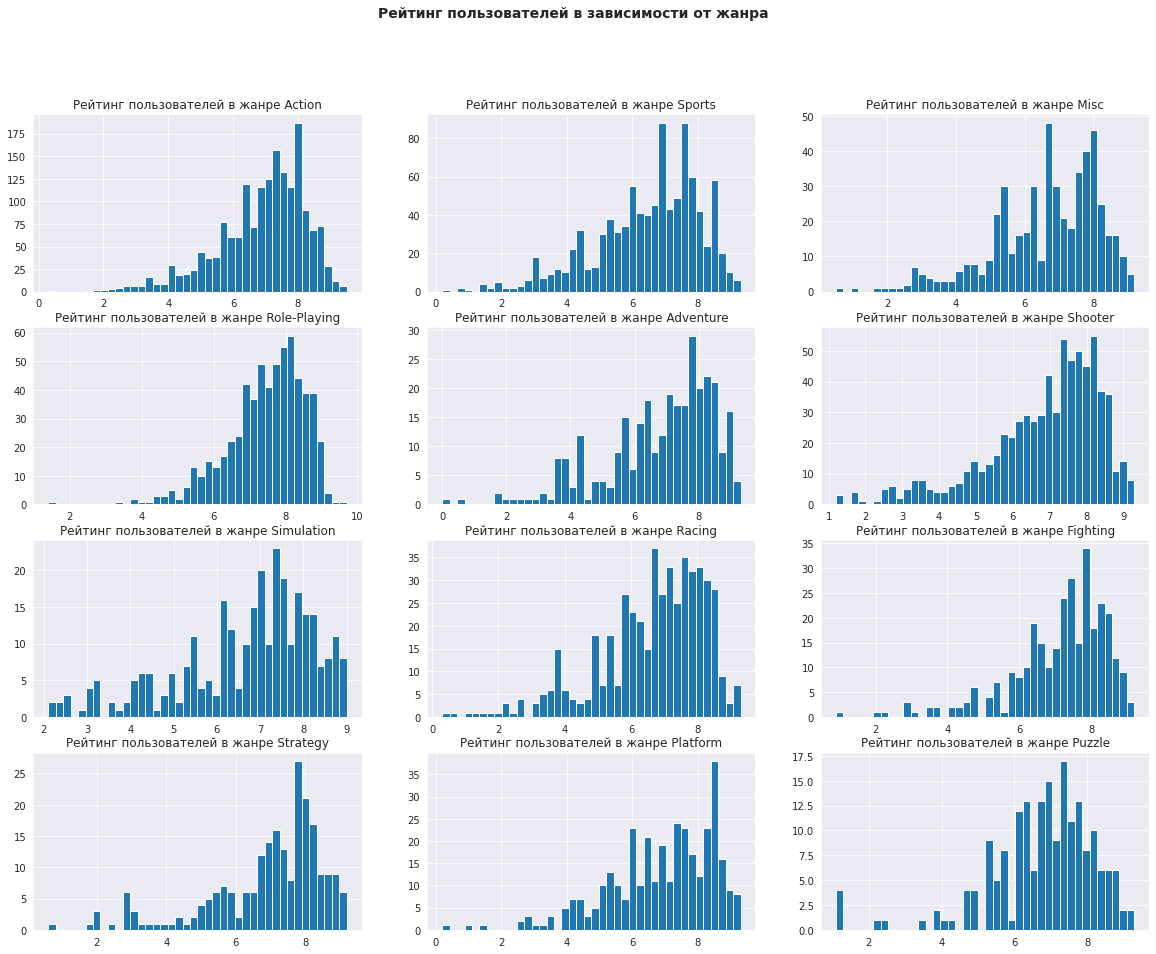

In [71]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
for i, genre in enumerate(genres):
    axs[i // 3][i % 3].hist(new_df.query('genre == @genre')['user_score'], bins=40)
    axs[i // 3][i % 3].set_title(f'Рейтинг пользователей в жанре {genre}')
    
    
plt.suptitle('Рейтинг пользователей в зависимости от жанра', fontsize=14, fontweight='bold');

О распределении оценок пользователей в зависимости от жанра можно сделать аналогичные выводы, но со следующими замечанием:
- рейтинг пользователей в жанре Role-Playing - это скошенное влево распределение, в отличии от распределения оценок критиков в том же жанре

#### Посмотрим на статистические показатели рейтинга критиков и пользователей в зависимости от жанра

In [72]:
for i, genre in enumerate(genres):
    print(f'Статистические показатели пользовательского рейтинга в жанре {genre}:')
    print('Среднее значение:', new_df.query('genre == @genre')['user_score'].mean())
    print('Стандартное отклонение:', 
          new_df.query('genre == @genre')['user_score'].std())
    print('Дисперсия:', new_df.query('genre == @genre')['user_score'].var())
    print('-------------------------------------------------------------------------')
    

Статистические показатели пользовательского рейтинга в жанре Action:
Среднее значение: 6.886733998756035
Стандартное отклонение: 1.3576266466452265
Дисперсия: 1.8431501116811626
-------------------------------------------------------------------------
Статистические показатели пользовательского рейтинга в жанре Sports:
Среднее значение: 6.455944914098718
Стандартное отклонение: 1.6135418838560212
Дисперсия: 2.6035174109576373
-------------------------------------------------------------------------
Статистические показатели пользовательского рейтинга в жанре Misc:
Среднее значение: 6.630363188673438
Стандартное отклонение: 1.5370177704598216
Дисперсия: 2.3624236267092806
-------------------------------------------------------------------------
Статистические показатели пользовательского рейтинга в жанре Role-Playing:
Среднее значение: 7.45742435799644
Стандартное отклонение: 1.08024232384913
Дисперсия: 1.166923478234969
------------------------------------------------------------------

## Этап 6. Проверка гипотез

Посмотрим на распределение пользовательских оценок на различных платформах

In [73]:
from scipy import stats as st

### Гипотеза. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза $H_{0}$ будет состоять в том, что средние пользовательские рейтинги платформ Xbox One и PC равны. Соответственно альтернативная ей гипотеза $H_{1}$ будет состоять в том, что средние пользовательские рейтинги платформ Xbox One и PC **не** равны.

In [74]:
print('Дисперсия пользовательских оценок на платформе XOne', 
      new_df.query('platform == "XOne"')['user_score'].var())
print('Дисперсия пользовательских оценок на платформе PC',
     new_df.query('platform == "PC"')['user_score'].var())

Дисперсия пользовательских оценок на платформе XOne 1.8845107057001402
Дисперсия пользовательских оценок на платформе PC 2.2713888084563187


Чтобы проверить гипотезу, используем метод `scipy.stats.ttest_ind()`

In [75]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(new_df.query('platform == "XOne"')['user_score'].dropna(), 
                       new_df.query('platform == "PC"')['user_score'].dropna())

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.022601178179713393
Отвергаем нулевую гипотезу


p-value говорит о том, что с вероятностью около 2% можно получить разные пользовательские рейтинги для двух платформ. Поэтому мы отвергли нашу нулевую гипотезу.

### Гипотеза. Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза $H_{0}$ будет состоять в том, что средние пользовательские рейтинги жанров Action и Sports **не** равны. Соответственно альтернативная ей гипотеза $H_{1}$ будет заключаться в том, что средние пользовательские рейтинги жанров Action и Sports равны.

In [76]:
print('Дисперсия пользовательских оценок в жанре Action', 
      new_df.query('genre == "Action"')['user_score'].var())
print('Дисперсия пользовательских оценок в жанре Sports',
     new_df.query('genre == "Sports"')['user_score'].var())

Дисперсия пользовательских оценок в жанре Action 1.8431501116811626
Дисперсия пользовательских оценок в жанре Sports 2.6035174109576373


In [77]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(new_df.query('genre == "Action"')['user_score'].dropna(), 
                       new_df.query('genre == "Sports"')['user_score'].dropna())

print('p-значение:', results.pvalue)

# results.pvalue -- вероятность того, что средние равны
# 1 - results.pvalue -- вероятность того, что средние не равны

if 1 - results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.6090069065131743e-13
Не получилось отвергнуть нулевую гипотезу


Поскольку вероятность того, что условие нулевой гипотезы выполняется больше критического уровня, мы не можем опровергнуть нулевую гипотезу.

## Этап 7. Общий вывод

## В итоге:
- Иследовали рынок видеоигр за последние 11 лет, и нашли потенциально прибыльные платформы: PS4, XOne и 3DS
- Определили самые прибыльные жанры игр: Shooter, Sports, Platform
- Построили портрет пользователя в зависимости от региона, и поняли, что культура и менталитет влияют на формирование определенных вкусов в играх
- Выяснили, что клиенты склонны прислушиваться к мнениям экспертов, нежели к обычным отзывам других игроков
- Узнали, что самым популярным рейтингом ESRB является - E (категория 6+)